# Samantha Gilbert
## Galaxies HW \#1
## Winter 2021

We are given a text file containing the SDSS measurements for about 600,000 stars with $b > 80^{\circ}$ and $14 < r < 21$. Each row represents a star, while each column represents a variety of observational quantities/measurements for each star. We will start by reading in this file.

In [405]:
#---------------------------------Import modules----------------------------------# 


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import scipy
plt.rcParams["font.family"] = "Times New Roman"
#sb.set_style('white')


#---------------------------------------------------------------------------------# 

In [406]:
#---------------------------------Read in data----------------------------------# 

with open('/Users/samanthagilbert/Desktop/galaxies_hw1/Astr511HW1data.dat', 'r') as ff:
    line1 = ff.readline()
    cols = line1.strip('#').split()
data = Table.read('/Users/samanthagilbert/Desktop/galaxies_hw1/Astr511HW1data.dat', format='ascii')

Now, we want to calculate the absolute magnitude $M_r$. To calculate absolute magnitude, we will need to calculate metallicity $[\textrm{Fe}/\textrm{H}]$ and change in absolute magnitude $\Delta{M_r}$.

Using Ivezi$\acute{c}$ (2008), we define

$$\Delta{M_r}([\textrm{Fe}/\textrm{H}]) = 4.50 - 1.11[\textrm{Fe}/\textrm{H}] - 0.18[\textrm{Fe}/\textrm{H}]^2$$

$${M_r}(g-i,[\textrm{Fe}/\textrm{H}]) = M_r^0(g-i) + \Delta{M_r}([\textrm{Fe}/\textrm{H}])$$

where we are given that metallicity can be expressed as

$$([\textrm{Fe}/\textrm{H}]) =  A + Bx + Cy + Dxy + Ex^2 + Fy^2 + Gx^2y + Hxy^2 + Ix^3 + Jy^3$$

using the fact that $x = (u - g)$ and $y = (g - r)$.

In [407]:
# Store filter values.

u = np.array(data['u'])
g = np.array(data['g'])
r = np.array(data['r'])
i = np.array(data['i'])
z = np.array(data['z'])

# Determine photometric color.

x = u - g
y = g - r
g_i = g - i

# Identify constants for metallicity function.

A = -13.13
B = 14.09
C = 28.04
D = -5.51
E = -5.90
F = -58.68
G = 9.14
H = -20.61
I = 0
J = 58.20 

# Calculate metallicity using function provided by Ivezic 2008.

def calc_metallicity(x,y):
        metallicity = A + B*x + C*y + D*x*y + E*(x**2) + F*(y**2) + G*(x**2)*y + H*x*(y**2) + I*(x**3) + J*y**3
        return metallicity

# For stars with g - r > 6, set Z = -0.6.
    
metallicities = np.ones(len(y))*-0.6
        
# Otherwise, use the function defined above to calculate metallicity.    
    
for star in range(len(y)):
    if y[star] < 0.6:
        metallicities[star] = calc_metallicity(x[star],y[star])

In [408]:
# Calculate change in magnitude.

def delta_abs_mag(metallicity):
    del_M = 4.50 - 1.11*metallicity - 0.18*metallicity**2
    return del_M

# Calculate initial magnitude using Ivezic 2008 A7.

def M_init(g_i):
    M_0 = -5.06 + 14.32*g_i - 12.97*g_i**2 + 6.127*g_i**3 - 1.267*g_i**4 + 0.0967*g_i**5
    return M_0

# Calculate absolute magnitude using initial magnitude and change in magnitude calculated above.

def abs_mag(g_i, metallicity):
    M = M_init(g_i) + delta_abs_mag(metallicity)
    return M

magnitudes = (abs_mag(g-i,metallicities)) # an array for storing our calculated abs. magnitudes

We are told to assume that Z = D, where

$$r - M_r = 5\log(D/10\:\textrm{pc}) $$ 

Solving for D, we find

$$D = 10^{\frac{r - M_r}{5}+1} $$

In [409]:
# Calculate D.

def D_val(r,M):
    D = 10**(((r - M) / 5) + 1)
    return D

D_vals = D_val(r,magnitudes) # an array for storing our distances
Z = D_vals # for clarity, rename as "Z"

## Problem 1

For stars with $0.2 < g - r < 0.4$, we will plot $\ln(\rho)$ vs $Z$, where $\rho$ is the stellar number density. We can approximate $\rho(Z) = N(Z)/V(Z)$,where $N(Z)$ is the number of stars in a given bin and $V(Z)$ is the bin volume. We are given that the solid angle $\Delta\Omega \sim 314$ deg$^2$.

From Lecture 3, we are given

$$dV = \Delta\Omega * D^2 *dD $$

where $\Delta\Omega$ is the solid angle and $dD$ is the bin size. We will use a bin size of 1 kpc based on Ivezi$\acute{c}$ (2008).

In [410]:
# Create new arrays for storing the distances (in kpc) and magnitudes of stars with
# 0.2 < g - r < 0.4. I know I did this the "slow" way, but I did not find it prohibitively slow, so
# I left it as is. 

cut_1 = []
mag_1 = []

for star in range(len(y)):
    if (y[star] < 0.4) and (y[star] > 0.2):
        cut_1.append(Z[star]/1000) # convert to kpc
        mag_1.append(magnitudes[star])

# Calculate dV using the given solid angel of 314 deg^2. Observing a bin size of 1 kpc based on
# Ivezic 2008, we estimate that there are ~25 bins in these plots. We use the same binning
# choices here.
        
volume_bins = (0.09565)*np.arange(1,25,1)**2 # 314 deg^2 converted to steradians       

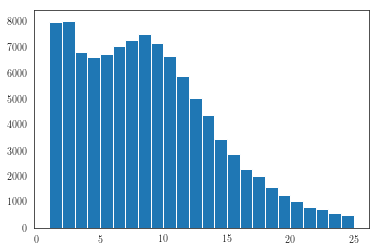

In [411]:
relevant_slice = np.logical_and(y<0.4,y>0.2) # A smarter, faster way for storing distances
N_z, num_bins, patch_objects = plt.hist(Z[relevant_slice]/1000, bins=np.arange(1,26))

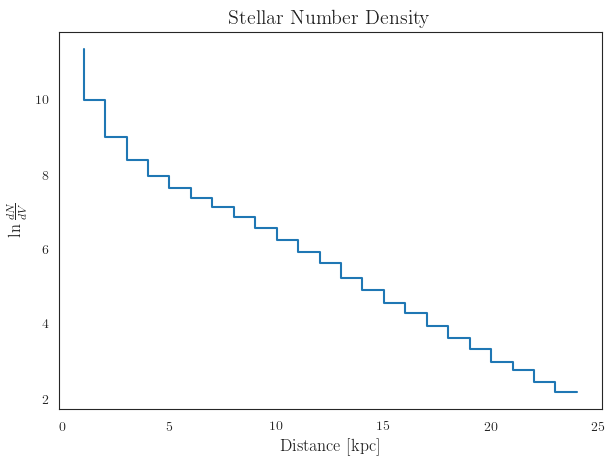

In [412]:
fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.step(np.arange(1,25,1),np.log(N_z/volume_bins)) #multiply y by dD/dV??
plt.xlabel('Distance [kpc]', fontsize='larger')
plt.ylabel('$\ln\\frac{dN}{dV}$', fontsize ='larger')
plt.title('Stellar Number Density', fontsize='x-large')
plt.show()

Now, we want to determine the distance cutoff $Z$ beyond which we no longer trust our results. There is an inherent bias to our observations in that, the farther we attempt to observe, the dimmer the objects get. This phenomenon results in an apparent decrease in objects with increasing distance. To figure out at what distance this phenomenon takes over, we can plot absolute magnitude with distance.

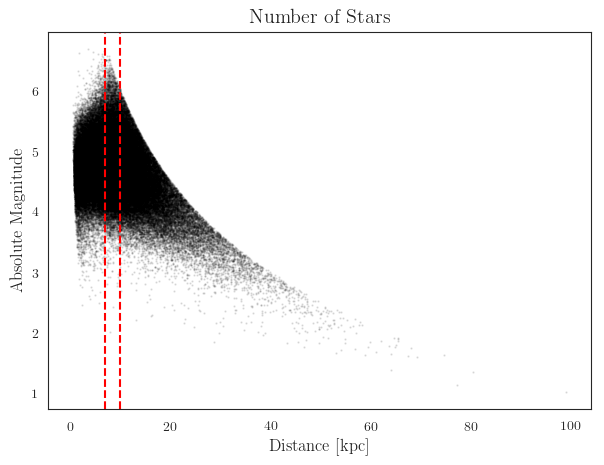

In [413]:
fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(cut_1, mag_1, s=0.5, alpha=0.1, color='k') 
plt.xlabel('Distance [kpc]', fontsize='larger')
plt.ylabel('Absolute Magnitude', fontsize='larger')
plt.title('Number of Stars', fontsize='x-large')
plt.axvline(7, color='r',linestyle='--')
plt.axvline(10, color='r',linestyle='--')
plt.show()

We can see that between $Z = 7$ and $Z = 10$ that the number of stars with distance begins to decrease with an apparently exponential relationship. It is in this region that our luminosity bias becomes applicable. Thus, we might impose a distance limit of $Z=7$ on our survey. 

We can now replot our stellar number density results with this cutoff.

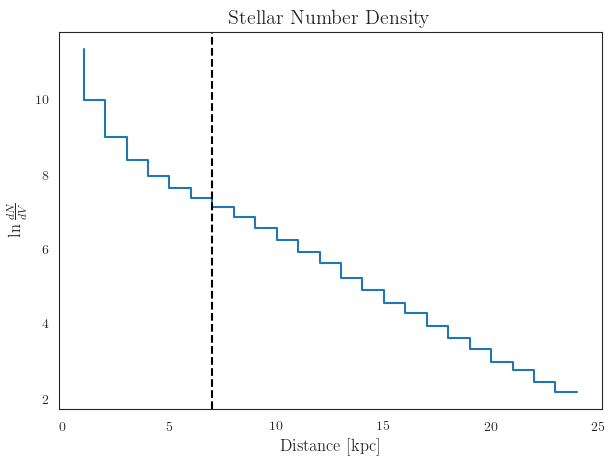

In [414]:
fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.step(np.arange(1,25,1),np.log(N_z/volume_bins)) #multiply y by dD/dV??
plt.axvline(7, color='k', linestyle='--')
plt.xlabel('Distance [kpc]', fontsize='larger')
plt.ylabel('$\ln\\frac{dN}{dV}$', fontsize ='larger')
plt.title('Stellar Number Density', fontsize='x-large')
plt.show()

## Problem 2

We now want to overplot the stellar number density for three different color ranges: $0.4 < g - r < 0.6$, $0.6 < g - r < 0.8$, $0.8 < g - r < 1.0$.

/Users/samanthagilbert/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/Users/samanthagilbert/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


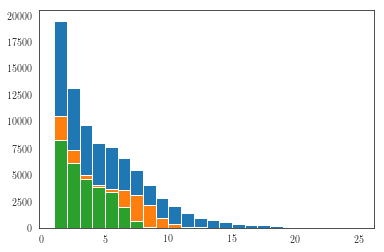

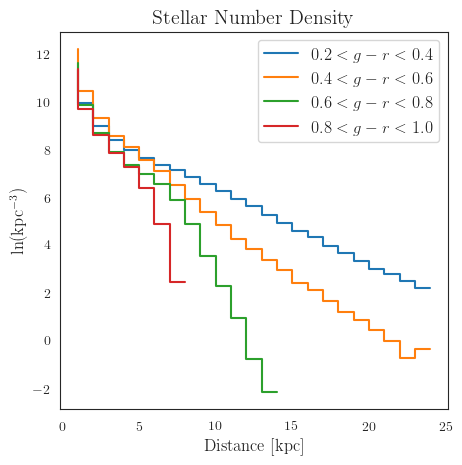

In [415]:
cut_2 = []
cut_3 = []
cut_4 = []

for star in range(len(y)):
    if (y[star] < 0.6) and (y[star] > 0.4):
        cut_2.append(Z[star]/1000) # convert to kpc
        
    if (y[star] < 0.8) and (y[star] > 0.6):
        cut_3.append(Z[star]/1000) # convert to kpc
        
    if (y[star] < 1.0) and (y[star] > 0.8):
        cut_4.append(Z[star]/1000) # convert to kpc

N_z_2, num_bins, patch_objects = plt.hist(cut_2, bins=np.arange(1,26))  
N_z_3, num_bins, patch_objects = plt.hist(cut_3, bins=np.arange(1,26))
N_z_4, num_bins, patch_objects = plt.hist(cut_4, bins=np.arange(1,26))
        
fig1 = plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
plt.step(np.arange(1,25,1),np.log(N_z/volume_bins), label="$0.2 < g - r < 0.4$") #multiply y by dD/dV??
plt.step(np.arange(1,25,1),np.log(N_z_2/volume_bins), label="$0.4 < g - r < 0.6$")
plt.step(np.arange(1,25,1),np.log(N_z_3/volume_bins), label="$0.6 < g - r < 0.8$")
plt.step(np.arange(1,25,1),np.log(N_z_4/volume_bins), label="$0.8 < g - r < 1.0$")
plt.xlabel('Distance [kpc]', fontsize='larger')
plt.ylabel('$\ln$(kpc$^{-3}$)', fontsize='larger')
plt.legend(fontsize='large')
plt.title('Stellar Number Density', fontsize='x-large')
plt.show()

We see that redder stars (higher $g - r$) values have number densities that fall off much faster with distance than for bluer stars (lower $g - r$). Thus, the reddest stars in our sample, with $0.8 < g - r < 1.0$ have a number density that falls off precipitously. In terms of absolute magnitude, bluer stars are also brighter than redder stars. As a result, we can explain this differing behavior between subsamples by recognizing that we are biased towards observing a greater number of bright stars with increasing distances. Similarly, our redder, fainter stars will have higher systematic errors than comparatively bluer, brighter stars.

## Problem 3

In this exercise, we will separate stars with $0.2 < g - r < 0.4$ by metallicity. We will define high metallicity as stars that have $[\textrm{Fe}/\textrm{H}] > -1.0$, while low metallicity stars will have $[\textrm{Fe}/\textrm{H}] < -1.0$. We will then plot $\ln(\rho)$ versus $Z$ for these subsamples and compare their trends.

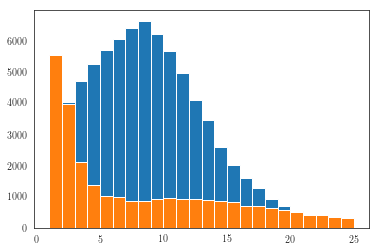

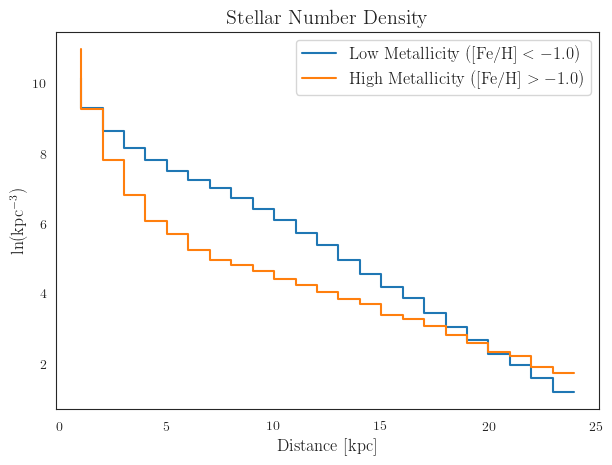

In [416]:
low_metallicity = []
high_metallicity = []
r_mags_low = []
r_mags_high = []

for star in range(len(y)):
    if (y[star] < 0.4) and (y[star] > 0.2):
        if (metallicities[star]) < -1.0:
            low_metallicity.append(Z[star]/1000) # convert to kpc
            r_mags_low.append(r[star])
        else:
            high_metallicity.append(Z[star]/1000)
            r_mags_high.append(r[star])

volume_bins = (0.09565)*np.arange(1,25,1)**2 # 314 deg^2 converted to steradians, D takes on values 0-25        

N_low, num_bins, patch_objects = plt.hist(low_metallicity, bins=np.arange(1,26))
N_high, num_bins, patch_objects = plt.hist(high_metallicity, bins=np.arange(1,26))

fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.step(np.arange(1,25,1),np.log(N_low/volume_bins), label='Low Metallicity ($[\\textrm{Fe}/\\textrm{H}] < -1.0$)') #multiply y by dD/dV??
plt.step(np.arange(1,25,1),np.log(N_high/volume_bins), label='High Metallicity ($[\\textrm{Fe}/\\textrm{H}] > -1.0$)') 
plt.xlabel('Distance [kpc]', fontsize='larger')
plt.ylabel('$\ln$(kpc$^{-3}$)', fontsize ='larger')
plt.title('Stellar Number Density', fontsize='x-large')
plt.legend(fontsize='large')
plt.show()

We find that initially, the number density of low and high metallicity stars is comparable. As distance increases, we find a higher number density of low metallicity stars compared to high metallicity stars. Eventually, once we reach a distance of 20 kpc, the number density of high metallicity stars actually overtakes that of their low metallicity peers. 

Up to the first couple of kpc, we are not looking through the disk, so we see a comparable number of low and high metallicity stars. Up to 20 kpc, we observe a higher number density of low metallicity stars because we are probing the halo. Stars in the halo tend to be older and thus lower metallicity since they formed from metal-poor nebulae. After 20 kpc, we are seeing the results of metallicity contamination. Our systematic photometric errors worsen with distance. Thus, at sufficiently large distances, low metallicity stars become classified as high metallicity stars. As a result, low metallicity counts bleed into high metallicity counts, and high metallicity stars appear to overtake low metallicity stars at large distances. 

## Problem 4

We will now plot and compare the differential r band magnitude contributions for the high and low metallicity subsamples.

/Users/samanthagilbert/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/samanthagilbert/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


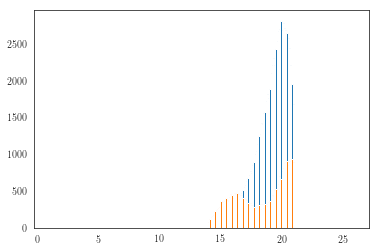

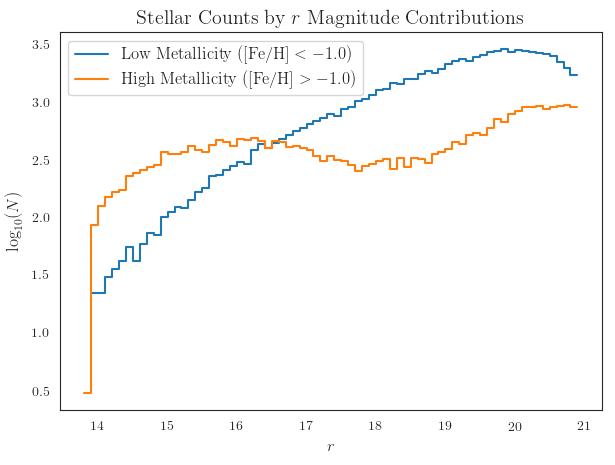

In [417]:
N_low, num_bins, patch_objects = plt.hist(r_mags_low, bins=np.arange(1,26,0.1))
N_high, num_bins, patch_objects = plt.hist(r_mags_high, bins=np.arange(1,26,0.1))

fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.step(np.arange(1,25.9,0.1),np.log10(N_low), label='Low Metallicity ($[\\textrm{Fe}/\\textrm{H}] < -1.0$)') #multiply y by dD/dV??
plt.step(np.arange(1,25.9,0.1),np.log10(N_high), label='High Metallicity ($[\\textrm{Fe}/\\textrm{H}] > -1.0$)') 
plt.xlabel('$r$', fontsize='larger')
plt.ylabel('$\log_{10}(N)$', fontsize ='larger')
plt.title('Stellar Counts by $r$ Magnitude Contributions', fontsize='x-large')
plt.legend(fontsize='large')
plt.show()

A linear function should fit the low metallicity line. However, because we are flux-limited at fainter magnitudes for low metallicity stars, the line appears to fall off at fainter magnitudes.

The high metallicity line appears to follow a bimodal distribution. However, the second "bump" in the line is a spurious product of our photometric errors. The first "bump" reflects the population of stars in the disk, which are younger and metal-rich. Thus, the peak of this bump gives us the scale height of the disk by fitting the curve with a power  law between $14 < r < 16$. The second "bump" emerges because our systematic photometric errors cause us to misclassify low metallicity stars as high metallicity stars. Without this metallicity contamination, we would anticipate the number of stars after the first bump to decrease directly with magnitude as fainter stars become more difficult to observe.

## Problem 5

We now want to identify the faint r-band limit for a survey to be able to map $\ln(\rho)$ vs. $Z$ out to 100 kpc using main sequence stars, as well as estimate the number of stars with $0.2 < g - r < 0.4$ between 90 and 100 kpc.

To identify the faint r-band limit, we return to our absolute magnitude plot in Problem 1 and identify the faintest absolute magnitude prior to the Z cutoff we established. From our plot, we find that this $M_r$ = 6.5. Using our equation from problem 1, we can solve for $r$

$$ r = 5\log(D/{10~\textrm{pc}}) + M_r $$

where $D = 100\times10^3 = 1\times10^5$ pc and $M_r = 6.5$.

In [418]:
def r_lim(D,M):
    r = (5*np.log10(D/10)) + M
    return r

print("The faint r-band limit is {}.".format(r_lim(1e5,6.5)))

The faint r-band limit is 26.5.


We find that the faint r-band limit is 26.5. We can understand $r$ as a proxy for distance for Main Sequence stars, as stars generally become fainter with distance. Our $r$ values only go up to 21, forcing us to extrapolate to longer distances and thus higher $r$ values. If we had a survey with a magnitude depth of 26.5, we would not need to extrapolate like this.

To estimate the number of stars with these magnitudes in the halo, we assume the same color distribution as the SDSS sample and a solid angle of $\Omega = 1$ deg$^2$ = $3.046\times10^{-4}$ sr. 

First, we will determine the distance at which stars in this band become flux-limited Z$_{max}$, as well as the distance at which we become dominated by halo stars, Z$_{min}$. We established in Problem 1 that $Z_{max} \sim 10$ kpc. From Ivezic 2008, we have that halo stars begin to dominate between 3-5 kpc, so we will choose $Z_{min} \sim 4$ kpc.

Next, we will calculate the distance from the galactic center. To do this, we must account for the fact that the earth is located 8 kpc from the galactic center, generating a distance offset. As a result, we must use the Pythagorean theorem to find the radial distance $R$ such that

$$R^2 = (8\:\:\textrm{kpc})^2 + Z^2 $$

We will then fit a cubic distance-density relation to the number of stars with distance $R$:

$$\rho \sim \frac{a}{R^3} $$

where $a$ is some normalization constant.

Finally, we will use the relation from our fit to extrapolate the number of stars between 90 and 100 kpc, integrating over this distance to produce our final estimate.

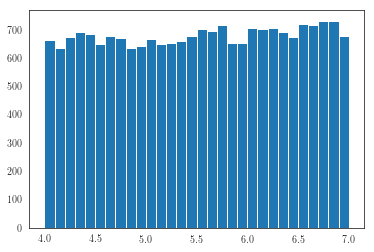

In [419]:
Z_min = 4 # Starting Z of the halo 
Z_max = 7 # Flux-limited Z limit

# Use the Pythagorean theorem to calculate the radial galactic distance R.
# Earth's distance to G.C. = 8 kpc

def galactic_rad(Z):
    radius = np.sqrt(8**2 + Z**2)
    return radius

radius_slice=[]

for radius in radii:
    radius_slice.append((radius > galactic_rad(Z_min)) and (radius < galactic_rad(Z_max)))

N_z, num_bins, patch_objects = plt.hist(Z[relevant_slice]/1000, bins=np.arange(4,7.1,0.1))
volume_bins = (0.09565)*np.arange(4,7,0.1)**2 

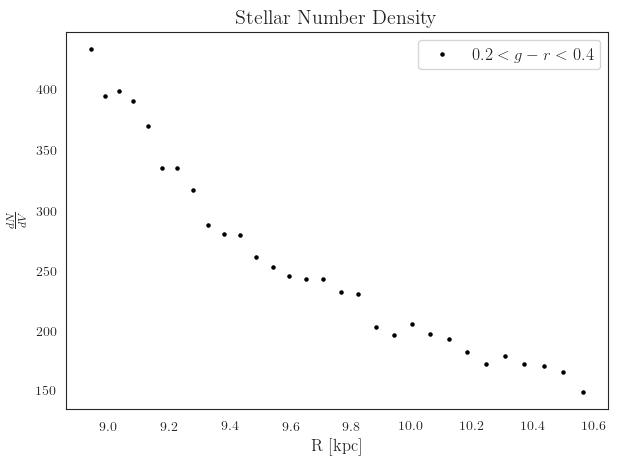

In [420]:
fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(galactic_rad(np.arange(4,6.9,0.1)),(N_z/volume_bins), color='k', s=5, label='$0.2 < g - r < 0.4$')
plt.xlabel('R [kpc]', fontsize='larger')
plt.ylabel('$\\frac{dN}{dV}$', fontsize ='larger')
plt.legend(fontsize='large')
plt.title('Stellar Number Density', fontsize='x-large')
plt.show()

In [421]:
xdata = galactic_rad(np.arange(4,6.9,0.1))
ydata = N_z/volume_bins

# Fit a cubic function to the data with a normalization constant.

def power_law(x, a):
    return a*x**-3

popt, pcov = scipy.optimize.curve_fit(power_law, xdata, ydata)

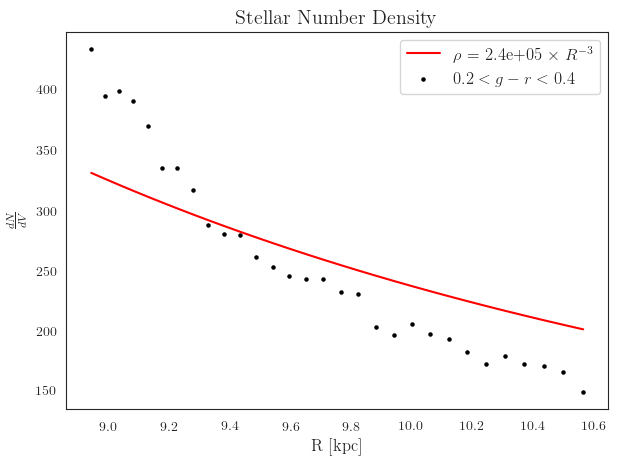

In [422]:
fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(xdata,ydata, color='k', s=5, label='$0.2 < g - r < 0.4$')
plt.plot(xdata, power_law(xdata, popt[0]), color='r', label='$\\rho$ = {:.2} $\\times$ $R^{{-3}}$'.format(popt[0]))
plt.xlabel('R [kpc]', fontsize='larger')
plt.ylabel('$\\frac{dN}{dV}$', fontsize ='larger')
plt.legend(fontsize='large')
plt.title('Stellar Number Density', fontsize='x-large')
plt.show()

Now to extrapolate!

In [423]:
def extrap(R):
    num_stars = popt[0]*R**-3
    return num_stars

rho = extrap(np.linspace(90,100,100)) # Calculate the number density for 90 < R < 100. Bin finely given the sparse number of stars we expect to encounter this far from the disk.

volume_bins = (3.046e-4)*np.linspace(90,100,100)**2 # Recalculate volume bins given solid angle = 1 deg^2.

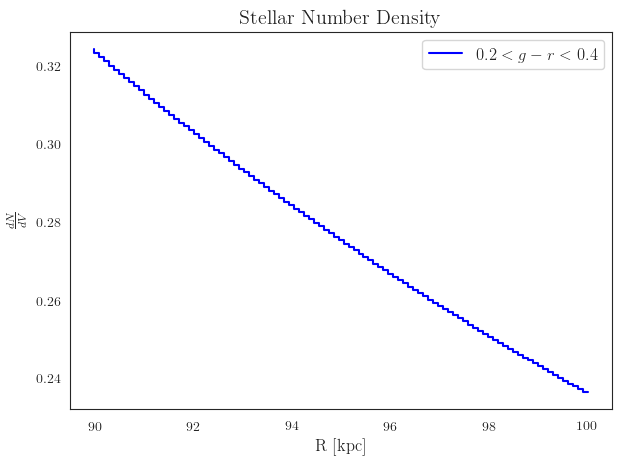

The number of stars between 90 and 100 kpc = 75.8363793438


In [424]:
fig1 = plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.step(np.linspace(90,100,100),rho, color='blue', label='$0.2 < g - r < 0.4$')
plt.xlabel('R [kpc]', fontsize='larger')
plt.ylabel('$\\frac{dN}{dV}$', fontsize ='larger')
plt.legend(fontsize='large')
plt.title('Stellar Number Density', fontsize='x-large')
plt.show()

N = rho*volume_bins # 
print"The number of stars between 90 and 100 kpc = {}".format(np.sum(N)) # Sum the number of stars in each bin between 90 and 100 kpc to get the total number of stars.

Extrapolating our $\rho$-$R$ relationship out to 90-100 kpc, we find ~75 stars between 90 and 100 kpc. However, we know this number is contaminated by comparatively brighter disk stars. 